In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
signal_number = 8
noise_number = 2

delsys =  np.loadtxt("delsys/fit/delsys_coleta_%s_fit.txt"%signal_number)
delsys_no_mean = delsys[:,1] - delsys[:,1].mean()

dev5 = np.loadtxt('dev5/dev5_coleta_%s.txt'%signal_number)
dev5_no_mean = dev5[:,1] - dev5[:,1].mean()


delsys_base_noise =  np.loadtxt(
    "delsys/fit/delsys_parado_%s_fit.txt"%noise_number)[:, 1]
dev5_base_noise = np.loadtxt('dev5/dev5_parado_%s.txt'%noise_number)[:, 1]

 ## Signals on time domain

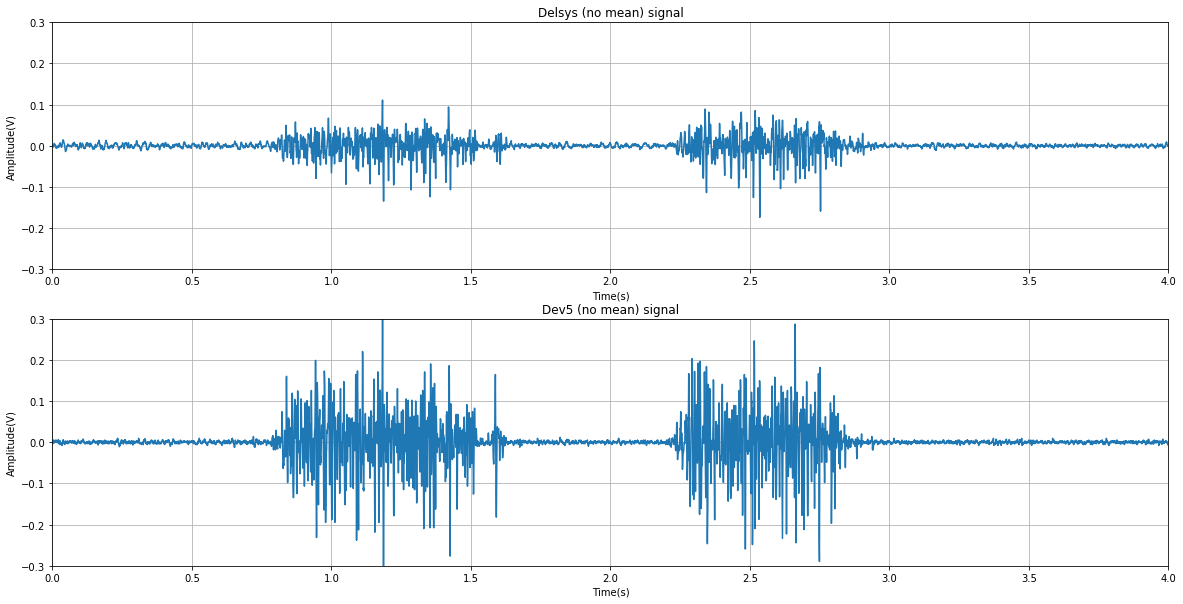

In [3]:
plt.figure(figsize=(20, 10))
y_range = (-0.3, 0.3)
x_range = (0., 4.)

plt.subplot(211)
plt.title("Delsys (no mean) signal")
plt.plot(delsys[:,0], delsys_no_mean)
plt.grid()
plt.ylim(*y_range)
plt.xlim(*x_range)
plt.ylabel("Amplitude(V)")
plt.xlabel("Time(s)")


plt.subplot(212)
plt.title("Dev5 (no mean) signal")
plt.plot(dev5[:,0], dev5_no_mean)
plt.grid()
plt.ylim(*y_range)
plt.xlim(*x_range)
plt.ylabel("Amplitude(V)")
plt.xlabel("Time(s)")


plt.show()

## Signal on frequency domain

In [4]:
fs = 2000. #Hz
t = 4. #seconds
samples = int(fs * t)
frequencies = np.fft.fftfreq(samples)
F = np.abs(frequencies * fs)

window = np.fft.fftshift(np.hanning(samples))

dev5_spectrum = np.abs(np. fft.fft(dev5_no_mean)) * window
delsys_spectrum =  np.abs(np.fft.fft(delsys_no_mean)) * window

normalized_dev5_spectrum = dev5_spectrum/dev5_spectrum.max()
normalized_delsys_spectrum = delsys_spectrum/delsys_spectrum.max()


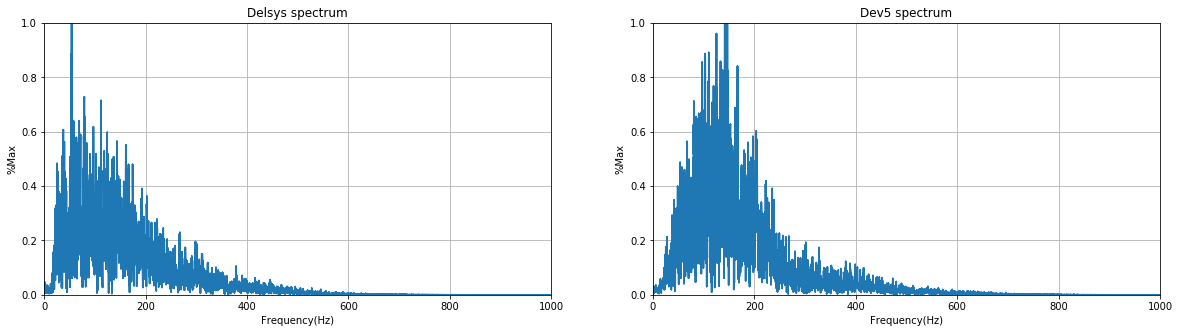

In [5]:
plt.figure(figsize=(20, 5))
x_range = (0.,1000.)
y_range = (0.,1.)

plt.subplot(121)
plt.title("Delsys spectrum")
plt.plot(F, normalized_delsys_spectrum)
plt.grid()
plt.xlim(*x_range)
plt.ylim(*y_range)
plt.ylabel("%Max")
plt.xlabel("Frequency(Hz)")


plt.subplot(122)
plt.title("Dev5 spectrum")
plt.plot(F, normalized_dev5_spectrum)
plt.grid()
plt.xlim(*x_range)
plt.ylim(*y_range)
plt.ylabel("%Max")
plt.xlabel("Frequency(Hz)")


plt.show()

# SNR (signal to noise ratio)

$$
SNR = 20log_{10}\left(\frac{S}{N}\right)
$$

In [6]:
snr = lambda  s, n: 20. * np.log10(s/n) 

### On the very own signal

In [7]:
# ranges
signal_range = (int(fs * 1.), int(fs *1.5))
noise_range = (int(fs * 3.5), int(fs *4.))

# signal range
delsys_signal_range = round(
    delsys_no_mean[signal_range[0]:signal_range[1]].max()
    - delsys_no_mean[signal_range[0]:signal_range[1]].min(),
    6
)
dev5_signal_range = round(
    dev5_no_mean[signal_range[0]:signal_range[1]].max()
    - dev5_no_mean[signal_range[0]:signal_range[1]].min(),
    6
)

# noise range
delsys_noise_range = round(
    delsys_no_mean[noise_range[0]:noise_range[1]].max()
    -delsys_no_mean[noise_range[0]:noise_range[1]].min(),
    6
)
dev5_noise_range = round(
 dev5_no_mean[noise_range[0]:noise_range[1]].max()
    -dev5_no_mean[noise_range[0]:noise_range[1]].min(),
    6
)

In [8]:
print("Delsys SNR: %.2f dB" % snr(delsys_signal_range, delsys_noise_range))
print("Dev5 SNR: %.2f dB" % snr(dev5_signal_range, dev5_noise_range))

Delsys SNR: 23.50 dB
Dev5 SNR: 31.77 dB


### Compared to base noise record

In [9]:
delsys_noise_level = delsys_base_noise.max() - delsys_base_noise.min()
dev5_noise_level = dev5_base_noise.max() - dev5_base_noise.min()

delsys_signal_level = delsys_no_mean.max() - delsys_no_mean.min()
dev5_signal_level = dev5_no_mean.max() - dev5_no_mean.min()

In [10]:
print("Delsys SNR: %.2f dB" % snr(delsys_signal_level, delsys_noise_level))
print("Dev5 SNR: %.2f dB" % snr(dev5_signal_level, dev5_noise_level))

Delsys SNR: 24.95 dB
Dev5 SNR: 31.28 dB


## RMS (root mean square)

$$
x_{RMS} =  \sqrt{\frac{1}{N} \sum_{i=1}^{N}x_{i}^{2}   }
$$

In [11]:
def window_rms(a, window_size):
    """Calculates a moving RMS using convulution."""
    
    a2 = np.power(a,2)
    window = np.ones(window_size)/float(window_size)
    
    return np.sqrt(np.convolve(a2, window, 'valid'))


In [12]:
window_size = 500

delsys_rms = window_rms(delsys_no_mean, window_size)
dev5_rms = window_rms(dev5_no_mean, window_size)

t_rms = delsys[window_size-1:,0]

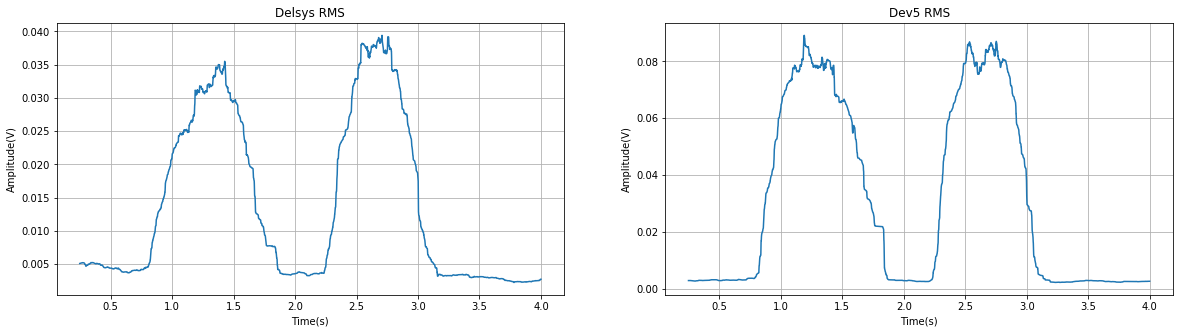

In [13]:
plt.figure(figsize=(20, 5))

plt.subplot(121)
plt.title("Delsys RMS")
plt.plot(t_rms, delsys_rms)
plt.grid()

plt.ylabel("Amplitude(V)")
plt.xlabel("Time(s)")


plt.subplot(122)
plt.title("Dev5 RMS")
plt.plot(t_rms,dev5_rms)
plt.grid()
plt.ylabel("Amplitude(V)")
plt.xlabel("Time(s)")


plt.show()